# Trafic Light Classifier Carla

In [28]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
#set_session(tf.Session(config=config))

## 1. Import Images from Data/Carla...

In [10]:
X_train = []
x_label = []
for img_class, directory in enumerate(['data/carla_red', 'data/carla_yellow', 'data/carla_green', 'data/carla_none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(file, (32,64))
        
        X_train.append(resized/255.)
        x_label.append(img_class)
print('checking datasets and labels')       
X_train = np.array(X_train)
x_label = np.array(x_label)

checking datasets and labels


In [11]:
print(X_train)

[[[[0.2745098  0.29411765 0.31764706]
   [0.2627451  0.29019608 0.31372549]
   [0.2627451  0.29019608 0.31372549]
   ...
   [0.25098039 0.27058824 0.31372549]
   [0.25098039 0.27058824 0.29803922]
   [0.25490196 0.2745098  0.29803922]]

  [[0.25882353 0.27843137 0.30196078]
   [0.26666667 0.28627451 0.30980392]
   [0.27058824 0.29019608 0.30980392]
   ...
   [0.24313725 0.25882353 0.30196078]
   [0.24313725 0.27058824 0.30196078]
   [0.2627451  0.27843137 0.31372549]]

  [[0.26666667 0.29019608 0.30588235]
   [0.25882353 0.27843137 0.30588235]
   [0.25882353 0.27843137 0.30196078]
   ...
   [0.24313725 0.25882353 0.29803922]
   [0.23921569 0.26666667 0.30588235]
   [0.25490196 0.28235294 0.32156863]]

  ...

  [[0.39607843 0.39215686 0.38039216]
   [0.37647059 0.36862745 0.37254902]
   [0.36470588 0.35686275 0.36862745]
   ...
   [0.26666667 0.27843137 0.30588235]
   [0.30980392 0.31372549 0.3372549 ]
   [0.2627451  0.26666667 0.28627451]]

  [[0.34901961 0.34509804 0.36470588]
   [0.3

## label information
label 0 : RED  
label 1 : YELLOW  
label 2 : GREEN  
label 3 : NONE   

In [12]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## 2. Build CNN

In [51]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras import losses, optimizers, regularizers

In [53]:
categorical_labels = tf.keras.utils.to_categorical(x_label) # https://keras.io/utils/#to_categorical
num_classes = 4 # red, yellow, green, none
model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.2)
model.add(Flatten())
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 131080    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
Total params: 132,012
Trainable params: 132,012
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, categorical_labels, batch_size=256, epochs=50, verbose=True, validation_split=0.1, shuffle=True)

Train on 407 samples, validate on 46 samples
Epoch 1/50
407/407 [==============================] - 0s 768us/sample - loss: 0.6520 - accuracy: 0.8157 - val_loss: 2.8897 - val_accuracy: 0.2174
Epoch 2/50
407/407 [==============================] - 0s 744us/sample - loss: 0.6373 - accuracy: 0.8084 - val_loss: 3.2211 - val_accuracy: 0.1957
Epoch 3/50
407/407 [==============================] - 0s 629us/sample - loss: 0.6224 - accuracy: 0.7961 - val_loss: 1.4997 - val_accuracy: 0.5652
Epoch 4/50
407/407 [==============================] - 0s 660us/sample - loss: 0.6598 - accuracy: 0.7887 - val_loss: 3.9288 - val_accuracy: 0.1957
Epoch 5/50
407/407 [==============================] - 0s 648us/sample - loss: 0.6216 - accuracy: 0.7813 - val_loss: 2.2692 - val_accuracy: 0.4130
Epoch 6/50
407/407 [==============================] - 0s 624us/sample - loss: 0.5819 - accuracy: 0.8501 - val_loss: 3.2335 - val_accuracy: 0.2174
Epoch 7/50
407/407 [==============================] - 0s 592us/sample - loss: 0

In [68]:
score = model.evaluate(X_train, categorical_labels, verbose=True)
print(score)

453/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [69]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

453/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
%matplotlib inline
fig = plt.figure()
import operator

LABELS = list(enumerate(['Red', 'Yellow', 'Green', 'None']))

def read_prediction(predictions):
    index, value = max(enumerate(predictions), key=operator.itemgetter(1))
    print('Max prediction score', value)
    print('Predicted label: ', LABELS[index][1])
    
def read_label(example_image_id):
    print(prediction[example_image_id])
    print('Ground truth label: ', print_label(categorical_labels[example_image_id]))
    read_prediction(prediction[example_image_id])
    plt.imshow(X_train[example_image_id])  
    
def print_label(categorical_label):
    color = ''
    for i in range(categorical_label.shape[0]):
        if categorical_label[i] == 1.0:           
            color = LABELS[i][1]
            if color != '': return color
        else:
            color = 'None'
    return color    

<Figure size 432x288 with 0 Axes>

In [58]:
import h5py # needed for model saving
model.save('tl_classifier_carla.h5')

[9.7230148e-01 2.4414813e-02 3.2834520e-03 2.8912083e-07]
Ground truth label:  Red
Max prediction score 0.9723015
Predicted label:  Red


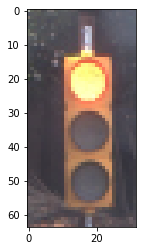

In [74]:
read_label(22)  

[0.10938762 0.8784521  0.01080839 0.0013518 ]
Ground truth label:  Yellow
Max prediction score 0.8784521
Predicted label:  Yellow


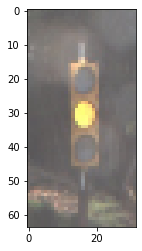

In [73]:
read_label(154)  

[0.05618899 0.04433945 0.88147604 0.01799549]
Ground truth label:  Green
Max prediction score 0.88147604
Predicted label:  Green


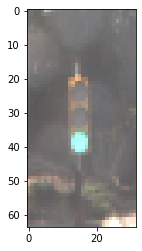

In [70]:
read_label(212)  

[0.05144302 0.01019181 0.25616264 0.68220246]
Ground truth label:  None
Max prediction score 0.68220246
Predicted label:  None


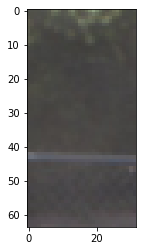

In [72]:
read_label(430)